<a href="https://colab.research.google.com/github/ksmarianiq/DataAnalyst/blob/main/Analyse_des_donnees_du_cas_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
!pip install xlrd==1.2.0

In [8]:
! ls datasets/

COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls


In [9]:
df=pd.read_excel('datasets/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls')
df.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [11]:
df.isnull().sum(axis=0)

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [12]:
df.notnull().sum(axis=0)

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61625
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

In [13]:
valeur_manquantes=df[df.isnull().any(axis=1)]
valeur_manquantes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
327,2020-01-12,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
328,2020-01-11,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
329,2020-01-10,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
330,2020-01-09,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
331,2020-01-08,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [14]:
valeur_manquantes.isnull().all()

dateRep                                                       False
day                                                           False
month                                                         False
year                                                          False
cases                                                         False
deaths                                                        False
countriesAndTerritories                                       False
geoId                                                         False
countryterritoryCode                                          False
popData2019                                                   False
continentExp                                                  False
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    False
dtype: bool

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [17]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

Pays avec les plus grand nombres de cas

In [18]:
df_by_country=df.groupby("countriesAndTerritories")["cases"].sum().sort_values(ascending=False)
df_by_country

countriesAndTerritories
United_States_of_America       16256754
India                           9884100
Brazil                          6901952
Russia                          2653928
France                          2376852
                                 ...   
Montserrat                            8
Falkland_Islands_(Malvinas)           8
Anguilla                              7
Marshall_Islands                      3
Vanuatu                               0
Name: cases, Length: 211, dtype: int64

Pays avec Taux de mortalité élevé

In [19]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [20]:
df_by_country1=df.groupby("countriesAndTerritories")["cases","deaths"].sum().sort_values("cases" ,ascending=False)
df_by_country1

<ipython-input-20-061653ea425d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country1=df.groupby("countriesAndTerritories")["cases","deaths"].sum().sort_values("cases" ,ascending=False)


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,8,1
Falkland_Islands_(Malvinas),8,0
Anguilla,7,0


In [21]:
df_by_country1["mortalite_rate"]=df_by_country1["deaths"] / df_by_country1["cases"]
df_by_country1.sort_values(by = "mortalite_rate" ,ascending=False)

,cases,deaths,mortalite_rate
countriesAndTerritories,,,
Yemen,2082,606,0.291066
Montserrat,8,1,0.125000
Mexico,1250044,113953,0.091159
Isle_of_Man,305,25,0.081967
Ecuador,202110,13875,0.068651
...,...,...,...
Eritrea,689,0,0.000000
Saint_Vincent_and_the_Grenadines,91,0,0.000000
Northern_Mariana_Islands,102,0,0.000000


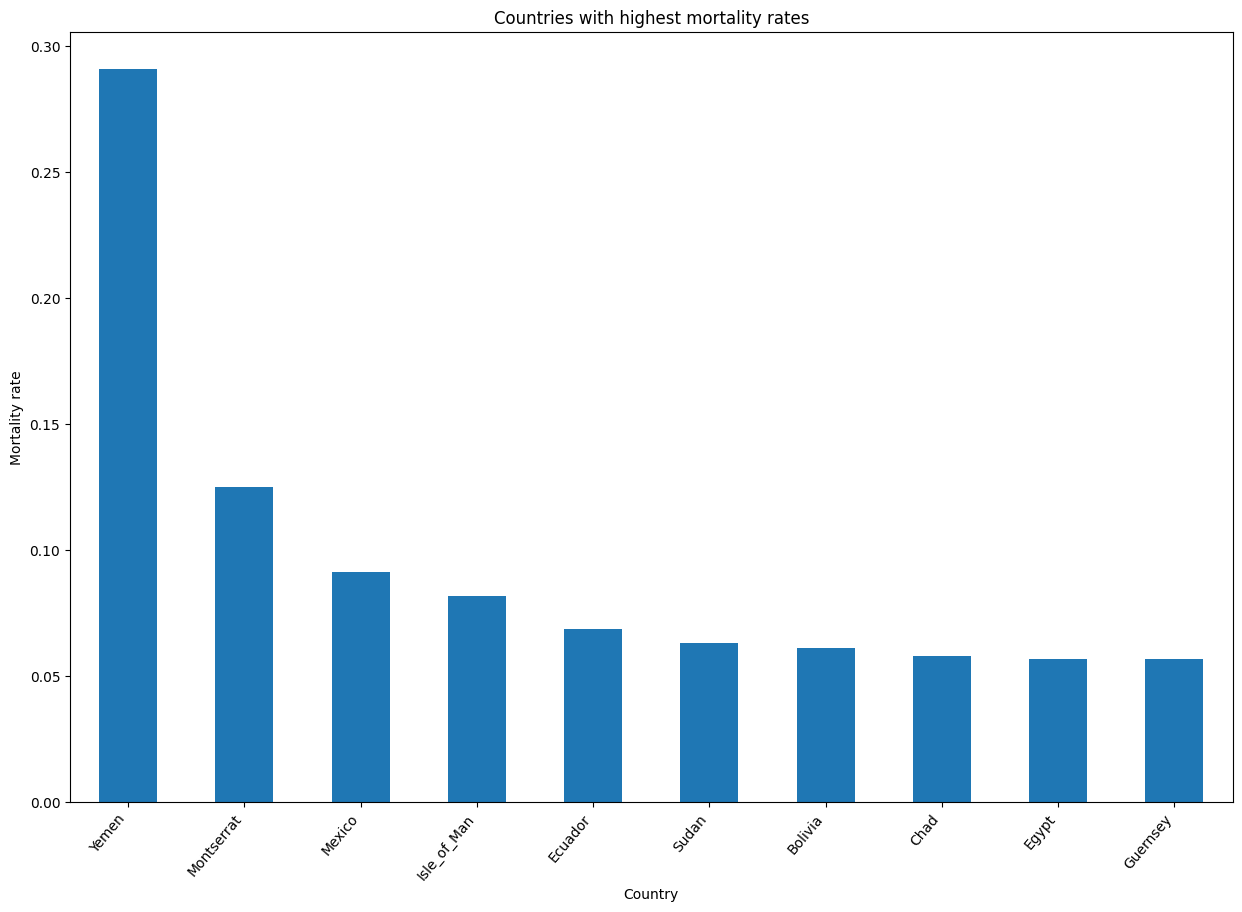

In [22]:
#Sorting the values for the mortality rate in the descending order
plt.figure(figsize=(15,10))
ax = df_by_country1['mortalite_rate'].sort_values(ascending=False).head(10).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")
plt.show()

Pays avec le plus de morts

In [23]:
df_by_country1["deaths"].sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64520
                             ...  
Eritrea                          0
Seychelles                       0
Faroe_Islands                    0
Mongolia                         0
Vanuatu                          0
Name: deaths, Length: 211, dtype: int64

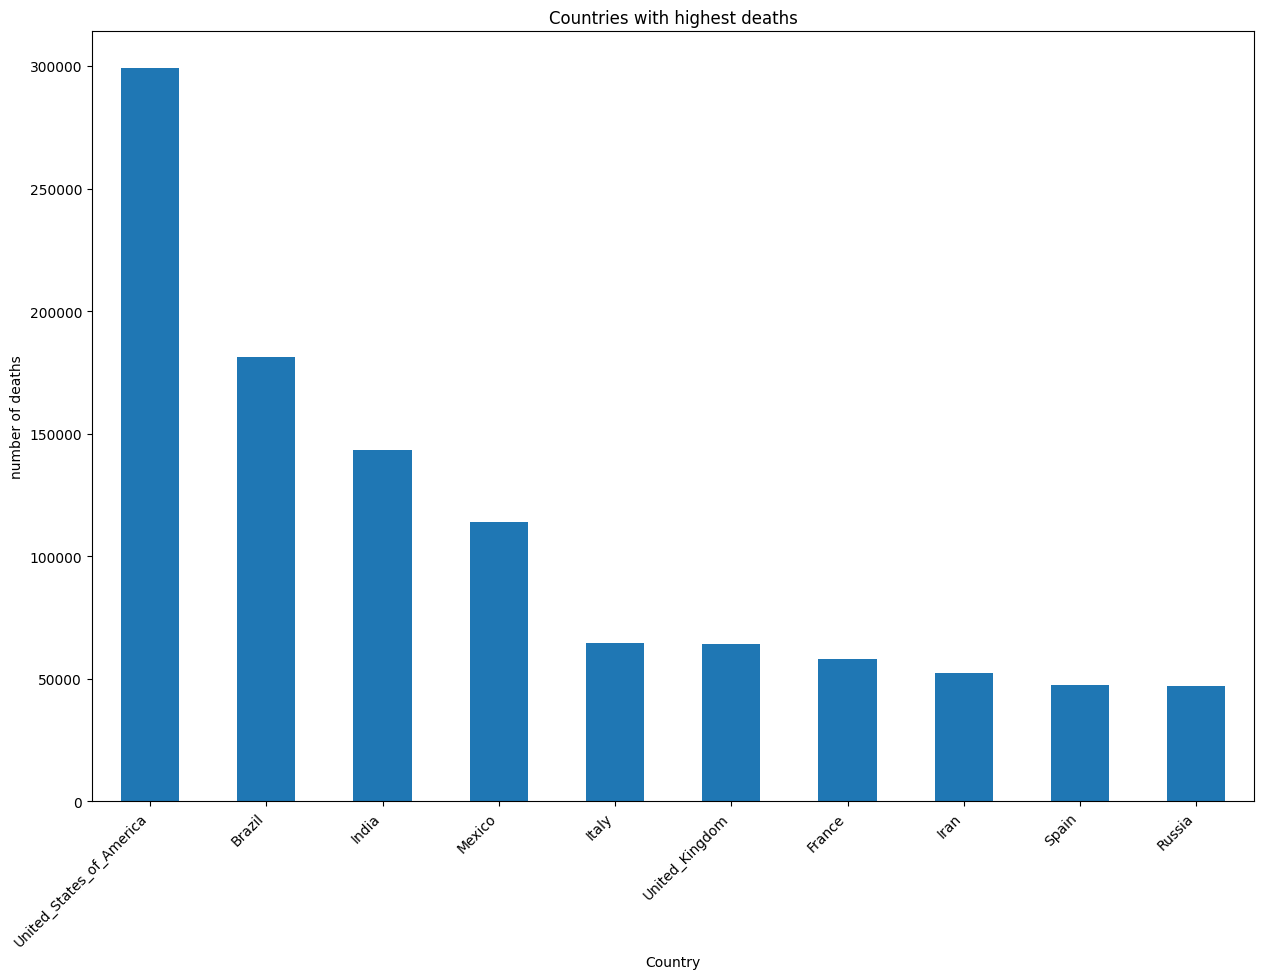

In [24]:
#Sorting the values for the deaths in the descending order
plt.figure(figsize=(15,10))
ax = df_by_country1['deaths'].sort_values(ascending=False).head(10).plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("number of deaths")
ax.set_title("Countries with highest deaths")
plt.show()

Effet du confinement sur le nombre de cas

In [25]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [26]:
df_by_month=df.groupby("month")["cases","deaths"].sum()
df_by_month

<ipython-input-26-ca429ec039d9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month=df.groupby("month")["cases","deaths"].sum()


,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118
6,4249352,134069
7,7065668,166185
8,7958523,178556
9,8452473,162120


Text(0, 0.5, 'Nombre de morts')

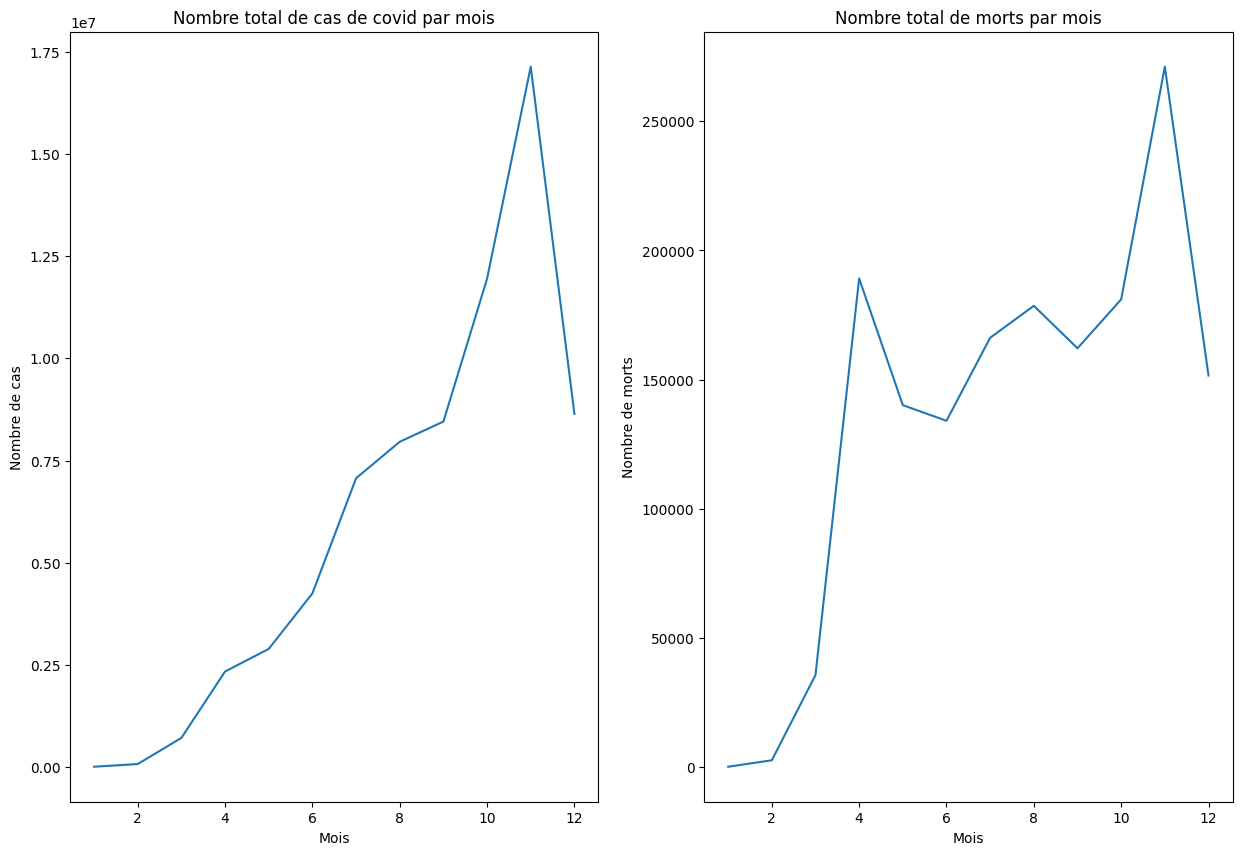

In [29]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")
df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")

Situation par continent ?

In [30]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [33]:
df.groupby("continentExp")["cases","deaths"].sum().sort_values("cases")

<ipython-input-33-68725a6936b4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("continentExp")["cases","deaths"].sum().sort_values("cases")


,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370


In [34]:
df.groupby("continentExp")["deaths","cases"].sum().sort_values("deaths")

<ipython-input-34-6dac3ff1aaee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("continentExp")["deaths","cases"].sum().sort_values("deaths")


,deaths,cases
continentExp,,
Oceania,1151,53298
Africa,56134,2361775
Asia,290097,16780431
Europe,479706,21395058
America,785370,30884895
